<a href="https://colab.research.google.com/github/noobmaster-ru/DLS_part1/blob/main/week1/Seminar_3_2_1_data_analysis_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h3 style="text-align: center;"><b>Семинар. Введение в анализ данных. Библиотеки Pandas, Matplotlib </b></h3>


<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

В этом семинаре вы научитесь проводить первичный анализ и визуализацию данных при помощи библиотек Pandas и Matplotlib. Мы будем работать с датасетом [Titanic](https://www.kaggle.com/competitions/titanic/overview).

**План семинара:**
* Работа с данными
  * Загрузка данных Titanic
  * Описание данных
  * Знакомство с данными и введение в pandas

* Анализ данных
  * Введение в matplotlib (+ бонус seaborn)
  * Очистка данных
  * Создание новых признаков (Feature Engineering)
  * Удаление данных
  * Шаг 1. Анализ целевой переменной
  * Шаг 2. Анализ признаков, по которым строится прогноз модели
    * Количественные признаки
      * Корреляция данных
    * Категориальные признаки
      * One-hot encoding
      * Label encoding
  * Шаг 3. Анализ влияния признаков на целевую переменную

* Подготовка данных
  * Разделение на train/test
  * Масштабирование признаков
  



Начнем!

## Данные

### Описание и загрузка данных

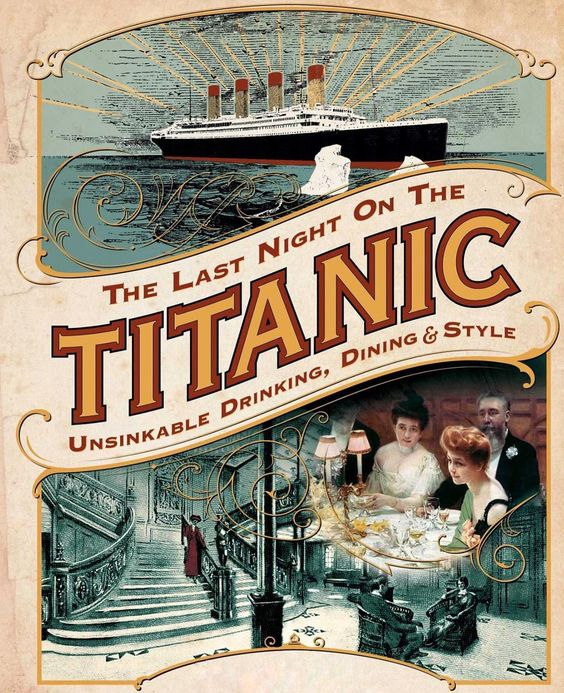

На датасете Titanic ставится задача бинарной классификации — по информации о пассажире предсказать, выживет пассажир или нет. Признаки в датасете следующие:

- **PassengerId** - id пассажира
- **Pclass** - класс обслуживания билета (1 = первый, 2 = второй, 3 = третий)
- **Name** - имя пассажира
- **Sex** - пол пассажира
- **Age** - возраст пассажира
- **SibSp** - семейные отношения sibling/spouse (sibling = брат, сестра, сводный брат, сводная сестра, spouse = муж, жена)
- **Parch** - семейные отношения parent/child (parent = родитель
child = ребенок). Некоторые дети путешествовали только с няней, поэтому для них parch=0.
- **Ticket** - номер билета
- **Fare** - стоимость билета
- **Cabin** - номер кабины
- **Embarked** - Порт посадки. (C = Шербур, Q = Квинстаун, S = Саутгемптон)

Целевая переменная:
- <font color='blue'>**Survived**</font> - Выжил человек или нет. 0 = Нет, 1 = Да.

Скачаем данные:

In [ ]:
!gdown 1KWlcYkMkDIZdATT2TTcnIfudNP-PSUci

In [ ]:
# подключаем гугл-диск к ноутбуку и затем можем скопировать данные на гугл-диск
# командами mv or cp
# from google.colab import drive
# drive.mount('/content/drive')

Иногда, когда данные много весят, имеет смысл сохранить их на свой гугл диск и подгружать в ноутбук оттуда.

Студенты с прошлых потоков сделали замечательную [инструкцию](https://disk.yandex.ru/i/sqqI2xVBcztIDw) по использованию Google Colab, где вы можно узнать, как можно загрузить данные на Google Disk.


Прежде чем работать с датасетом Титаник, давайте познакомимся с библиотекой Pandas. Это библиотека для удобной работы с данными, представленными в виде таблиц.

### Знакомство с данными и введение в pandas

**Pandas** - это библиотека Python для удобной работы с данными, представленными в виде таблиц.

В ней есть удобные функции для анализа, очистки, изучения и предобработки данных.

Рекомендуемые материалы по Pandas:
* Очень классный плейлист на ютубе [What is a Pandas?](https://youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&si=6faVt2CiaaA73QAQ).

В Google Colab библиотека Pandas установлена по умолчанию, но в случае чего установить ее можно так:

In [ ]:
!pip install pandas

Импортируем библиотеку. Pandas обычно импортируется как `pd`:



In [ ]:
import pandas as pd

#### Pandas Series

Одной из основных структур данных в библиотеке Pandas является Pandas Series. Элемент Pandas Series похож на столбец в таблице: это одномерный массив, содержащий данные любого типа.

Элементы Pandas Series помечаются номерами индексов. Первое значение имеет индекс 0, второе - индекс 1 и т. д.

Заведем столбец Series из обычного питоновского массива:

In [ ]:
a = [1, 7, 2]

series = pd.Series(a)

series

In [ ]:
series = pd.Series(a, index= ['x','y','z'])
series

В Series массивах доступ к элементам по индексу осуществляется с помощью .iloc:

In [ ]:
series.iloc[0]

А если по названию , то .loc:

In [ ]:
series.loc['x']

Также можно изменить столбец индексов на кастомный. Делается это так:

In [ ]:
series = pd.Series(a, index = ["x", "y", "z"])

series

In [ ]:
series.loc['x']

In [ ]:
series.iloc[2]

#### Pandas DataFrame

Столбец — это хорошо, но мы чаще работаем с целыми таблицами данных (наборами столбцов). Тип данных, соответствующий таблице — DataFrame.

Pandas DataFrame - это двумерная структура данных, подобная двумерному массиву или таблице со строками и столбцами. Иными словами, Pandas Series - это один столбец таблицы, а DataFrame - это вся таблица.

In [ ]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

# можно создать таблицу из Python Dict
# keys словаря будут названиями столбцов
df = pd.DataFrame(data)
df

Доступ к отдельному столбцу таблицы можно получить по названию этого столбца:

In [ ]:
df['calories']

In [ ]:
df['duration']

Доступ к строке таблицы также осуществляется с помощью .iloc:

In [ ]:
df.iloc[1]

In [ ]:
df.loc[1]

#### Создание таблицы Pandas DataFrame из файла

Чаще всего в машинном обучении мы работаем с данными, сохраненными в файлах формата [.csv (comma separated values)](https://blog.skillfactory.ru/glossary/csv-format/#:~:text=CSV%20(Comma%2DSeparated%20Values)

Выше мы скачали датасет Титаник. Самое время загрузить его с помощью Pandas DataFrame. Это делается следующим образом:

In [ ]:
df = pd.read_csv("/content/titanic.csv")
df

In [ ]:
# index_col задает название колонки в файле, которая будет считаться колонкой индексов
df = pd.read_csv("/content/titanic.csv", index_col='PassengerId')
df

#### Исследование данных

Метод `.head()` позволяет вывести первые несколько строк таблицы в красивом формате.

In [ ]:
df.head(3)

Чтобы вывести рандомные строки в таблице, воспользуемся методом `.sample()`

In [ ]:
df.sample(5)

Также есть метод `.tail()` для просмотра нескольких последних строк DataFrame.

In [ ]:
df.tail(3)

Воспользуемся методом `loc`, чтобы посмотреть на одну или несколько строк наших данных:

In [ ]:
df.loc[889] # к конкретной строке

In [ ]:
df.loc[3]

In [ ]:
# выведет с 7 по 14 включительно
df.loc[7:14]

In [ ]:
# выведет с 8 по 14 включительно
df.iloc[7:14]

In [ ]:
# выведет 1, 7, 12 строки
df.loc[[1,7,12]]

In [ ]:
# выведет 2 , 8 , 13 тк индексы на +1!!!
df.iloc[[1,7,12]]

Далее, вывести список колонок в нашей таблице можно с помощью метода .columns:

In [ ]:
df.columns

Как мы видели выше, доступ к конкретной колонке можно получить по ее названию:

In [ ]:
df['Name']

In [ ]:
df['Survived']

Теперь: с помощью метода `.loc()` можно обратиться к конкретным элементам данных на основе индексов их строк и столбцов:

In [ ]:
df.head(3)

In [ ]:
df.loc[2, 'Pclass']

In [ ]:
# элемент на пересечении 1 строки и столбца Survived
df.loc[1, 'Survived']

In [ ]:
# элементы колонки Survived с индексами строк от 2 до 5
df.loc[2:5,'Survived']

In [ ]:
# элементы колонок Survived и Sex с индексом строк от 0 до 5
df.loc[:5,['Survived', 'Age']]

In [ ]:
# элементы колонок Survived и Sex с индексом строк от 0 до 5
df.loc[2:5,'Survived':'Age']

Также в Pandas таблице можно отфильтровать элементы на основе условий. Например, так мы можем вывести строки, в которых значение колонки Sex равно 'male':

In [ ]:
df.loc[(df.Sex == 'male')]

Также можно соединять несколько условий. Например, давайте выведем строки таблицы, для которых значение столбца Sex равно 'male', а Survived равно 0 (т.е. мы выводим людей мужского пола, не выживших на Титанике):

In [ ]:
df.loc[(df.Sex == 'male') & (df.Survived == 0)]

& соответствует "и", | соответствует "или". Так можно вывести всех людей из датасета, которые либо мужчины, либо не выжили на Титанике:

In [ ]:
df.loc[(df.Sex == 'male') | (df.Survived == 0)]

Также, получая доступ к элементу с помощью `.loc()`, можно обновить значение этого элемента в таблице. Давайте, например, поменяем значения 0 в колонке Survived на -1.

Вот как сейчас выглядят наши данные:

In [ ]:
df.head(5)

Поменяем значения 0 колонки Survived на -1:

In [ ]:
df.loc[(df.Survived == 0), ['Survived']] = -1

Вот что получится:

In [ ]:
df.head()

И вернем обратно все как было:

In [ ]:
df.loc[(df.Survived == -1), ['Survived']] = 0.0

Далее, у объекта DataFrame есть удобные методы для получения общей информации о данных.

Метод `.info()` сообщает нам, сколько в наших данных строк и столбцов, и для каждого столбца дает его название, тип данных в нем и количество непустых значений в нем:

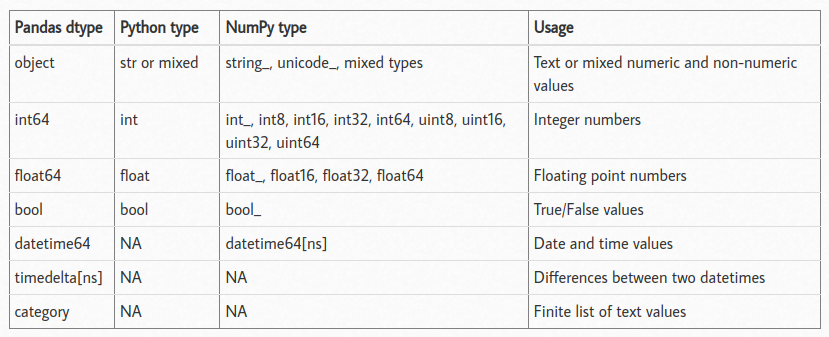

In [ ]:
df.info()

Как видим, в нашем наборе данных в столбце Survived только 891 из 1309 не пропущены. Это означает, что в 418 строках столбца Survived по какой-то причине вообще нет значений.

Пропущенные значения составляют проблему при анализе данных и обучении моделей. С такими значениями обычно нужно что-то делать. Об этом мы поговорим позже в теме очистки и предобработки данных.

Еще один метод описания данных — `.describe()`. Он выводит основные статистики числовых столбцов данных:

In [ ]:
df.describe()

Итак, мы научились считывать наши данные с файла и смотреть на них. Давайте теперь попробуем проанализировать их.

## Анализ данных

### Библиотека Matplotlib

Сейчас мы познакомимся с **Matplotlib** — удобной библиотекой, которая поможет нам визуализировать наши данные и сделает их анализ более приятным.

Материалы для ознакомления:
* Для базового ознакомления можно почитать [Matplotlib Quick Start](https://matplotlib.org/stable/tutorials/introductory/quick_start.html).
* Данный семинар вдохновлялся данной лекцией про визаульный анализ данных $→$ [тык на ссылку](https://www.youtube.com/watch?v=uJpDzHGUamg&ab_channel=machinelearrrning).

Устанавливается библиотека так (как и Pandas, в Google Colab она установлена по умолчанию):

In [ ]:
!pip install matplotlib

Испортируется Matplotlib следующим образом:

In [ ]:
import matplotlib.pyplot as plt

Давайте еще импортируем библиотеку Numpy, она нам понадобится в процессе:

In [ ]:
import numpy as np

Теперь давайте научимся строить простой линейный график с помощью Matplotlib.

In [ ]:
# Зададим значения x и y
x = np.arange(10)
y = np.random.randint(1, 10, size=10)

print(f'x = {x}')
print(f'y = {y}')

# Задаем размер полотна, на котором будет отрисован график
plt.figure(figsize=(10,7))
# Построим линейную диаграмму
plt.plot(x, y)

# Добавим заголовок
plt.title("График зависимости x от у")

# Добавим подпись к осям
plt.xlabel("x")
plt.ylabel("y")

# Отрисовываем результат
plt.show()

Также можно отрисовывать точки, не соединенные линиями. Это называется Scatter Plot:

In [ ]:
# Зададим значения x и y
x = np.arange(10)
y = np.random.randint(1, 10, size=10)

print(f'x = {x}')
print(f'y = {y}')

# Задаем размер полотна, на котором будет отрисован график
plt.figure(figsize=(10,7))
# Строим Scatter Plot
plt.scatter(x, y)

# Добавим заголовок
plt.title("График зависимости x от у")

# Добавим подпись к осям
plt.xlabel("x")
plt.ylabel("y")

# Отрисовываем результат
plt.show()

Давайте сделаем наш график немного красивее: отрисуем две линии разных цветов и подпишем оси. Классный сайт для подбора цветов: [In Color Balance](https://color.romanuke.com/)

In [ ]:
# Хочу чтоб было красиво...

x = np.arange(10)
y = np.random.randint(1,10,size=10)
z = np.random.randint(1,10,size=10)

# задаем размер диаграммы
plt.figure(figsize=(10,7))

# рисуем линейный график
plt.plot(x,y, color="#68904D", label='данные y')
plt.plot(x,z, color="#EE9B01", label='данные z')

# add title
plt.legend(fontsize=15)
plt.title("Данные vs Время", fontsize=20)

# подписываем оси
plt.xlabel("Время",fontsize=20)
plt.ylabel("Данные",fontsize=20)

# так можно ограничить координаты осей OX и OY
# plt.xlim([-5, 20])
# plt.ylim([-5,20])

# отрисовываем сетку
plt.grid()

# Отрисовываем результат
plt.show()


Отлично, с основным синтаксисом Matplotlib для рисования графиков мы познакомились. Давайте теперь продолжим исследовать наши данные.

In [ ]:
plt.style.use('fivethirtyeight')

### Предобработка (очистка) данных

Очистка данных - это удаление или замена плохих данных в датасете.

Плохими данными могут быть:
* Пустые ячейки
* Данные в неправильном формате
* Неправильные данные
* Дубликаты

Выше мы уже обнаружили NaN значения в датасете в колонке Survived. Давайте поймем, где вообще в наших данных есть пропущенные значения.

In [ ]:
df.head(5)

Мы можем вывести для каждого элемента данных, пропущен он или нет, с помощью метода .isna():

In [ ]:
df.isna()

Cуммируем по оси 0, чтобы узнать количество пропущенных значений в каждом из столбцов:

In [ ]:
df.isna().sum(axis=0)

А если суммировать по оси 1, получим количества пропущенных значений для каждой из строк:

In [ ]:
df.isna().sum(axis=1) # так и по оси 1

Также для красоты и удобства можно визуализировать количество пропущенных значений следующим способом:

In [ ]:
data = df.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data.index, data.values)

Давайте рассмотрим еще один способ визуализации — тепловую карту (heatmap). Ее мы построим при помощи библиотеки seaborn.


Для начала, поймем, что такое тепловая карта. Давайте рассмотрим простой массив:

In [ ]:
import seaborn as sns

In [ ]:
array = np.random.randint(1,100,size=(4,4))
array

Построим для него тепловую карту. Эта карта для каждого элемента данных цветом показывает величину этого элемента: элементы с большими абсолютными значениями выделены более яркими, белыми цветами, элементы с меньшими значениями выделены более темными цветами. Такая карта позволяет визуально оценить распределение и относительную величину элементов таблицы.

In [ ]:
sns.heatmap(array, annot = True)

Построим тепловую карту для наших пропущенных данных:

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isna().transpose())

In [ ]:
na_percentage = round((df['Cabin'].isna().sum() / len(df['Cabin'])) * 100, 3)
print(f'{na_percentage} % пропущенных данных у признакак Cabin')

Мы видим, что у признаков Age и Embarked есть пропуски. Нам нужно решить, что с ними делать. Например, можно удалить строки с пропущенными значениями. Или мы можем заполнить их какими-нибудь значениями. Чаще всего для этого используются статистики элементов в столбце, в котором мы заполняем пропуски: например, среднее, медиана или мода:

- **Мода** - значение изменяемого признака, которое встречается максимально часто.

- **Медиана** - значение признака, которое делит упорядоченное множество данных пополам.

- **Среднее** - среднее арифметическое, т.е. сумма всех значений признака, деленная на количество значений признака.

Если распределение симметрично, унимодально (имеет только одну моду) и не имеет заметных выбросов, то все три меры примерно дадут одинаковое значение. Если же ассиметрично или имеет заметные выбросы, лучше ориентироваться на моду или медиану.

Для числовых признаков часто используется медиана, для категориальных — мода.

Возьмем категориальный признак Embarked и выведем, сколько раз в этом столбце встречаются разные значения:

In [ ]:
df['Embarked'].value_counts()

На эту же информацию можно посмотреть в другом виде:

In [ ]:
# Нарисуем столбчатую диаграмму Embarked признака
data = df['Embarked'].value_counts()

plt.bar(data.index, data.values)

Самое часто встречающееся значение (оно же мода этого признака) — S:

In [ ]:
df['Embarked'].mode()

Теперь возьмем числовую колонку с пропущенными значениями Age и выведем ее медиану и среднее значение:

In [ ]:
mean_Age = np.mean(df['Age'].dropna().values)
median_Age = np.quantile(df['Age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")

Нарисуем распределение признака Age с его средним и медианой:

In [ ]:
plt.hist(df['Age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

Мы только что рассмотрели несколько способов визуализации информации о колонках датасета. Эту информацию можно использовать для заполнения пропсуков в данных. Но сейчас давайте просто удалим все строки с пропущенными значениями из нашего датасета.

In [ ]:
# Удаляем все NaN
df.dropna(inplace=True)

Проверяем, что пропущенных значений не осталось:

In [ ]:
df.isna().sum()

###  Создание новых признаков

Рекомендуемые материалы:
- Курс по [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) от Kaggle

Давайте посмотрим на столбец Name наших данных:

In [ ]:
df['Name']

Name — колонка с именами пассажиров Титаника. Кажется, что эта колонка не очень информативна для определения того, выжил пассажир или нет. Вряд ли пассажиров спасательных шлюпок отбирали по их именам. Единственное, что может быть информативным в этом признаке — это Title (Miss/Mr/Ms) пассажира. Поэтому прежде чем удалить эту колонку из данных, давайте проверим корреляцию между этим признаком и целевой переменной (колонкой Survived).

В ячейке ниже мы извлекаем признак Title с помощью регулярных выражений. Шаблон RegEx (\w+\.) ищет первое слово, заканчивающееся точкой, в признаке Name. Флаг expand=False возвращает DataFrame.

In [ ]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Мы видим, что есть некоторые титулы, которые встречаются нечасто. Давайте редкие титулы заменим на один класс, назовем его "Rare":

In [ ]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [ ]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Зачем нужно создание новых признаков? Вот несколько причин:

1. Иногда создание новых признаков помогает улучшить обучение модели. Это может происходить, если признаки очень похожи друг на друга. Тогда их объединение может дать большую пользу, чем признаки по отдельности. Например, если несколько признаков в данных сильно скоррелированы, то это вредит обучению линейных моделей. И если эти признаки объединить в один, результат может улучшиться.
2. Объединение признаков в какой то один признак позволяет уменьшить вычислительную сложность, так как модели нужно смотреть не на несколько признаков, а только на один, который будет вбирать в себя все важное.
3. Это помогает в некоторых случаях понятнее интерпретировать результаты.

### Удаление ненужных столбцов

Удалим ненужные признаки, такие как имя пассажира и номер билета (Name и Ticket), которые не несут существенной информации для предсказания. Также удалим признак Cabin, который почти полностью состоит из пропущенных данных.

In [ ]:
# Удалим ненужные признаки

df.drop(columns=["Cabin", 'Name', 'Ticket'], inplace=True)

In [ ]:
df.head(3)

### Шаг 1. Анализ целевой переменной

Давайте посмотрим на распределение значений целевой переменной Survived:

In [ ]:
plt.figure(figsize = (10, 5))

df['Survived'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Survived')

plt.suptitle('Distribution of Survived')
plt.show()

Мы видим, что значения распределены не совсем ровно, но критичного перекоса тоже нет. Если значения целевой переменной несбалансированы (тогда говорят, что датасет несбалансирован), то нужны специальные методы для борьбы с дисбалансом.

### Шаг 2. Анализ признаков

При исследовании и сборе данных очень важно знать, какого рода данные вы получаете, чтобы их можно было хорошо интерпретировать и анализировать. Чаще всего в исследованиях используются два типа данных:
* Категориальные данные
* Количественные (Числовые) данные


**Категориальные данные** — это данные с ограниченным числом уникальных значений или категорий. Примеры таких типов данных — пол, семейное положение, уровень образования и т.п. Категориальные поля могут быть текстовыми или числовыми, в которых категории закодированы числовыми кодами (например, 0 = Женский, а 1 = Мужской). Также иногда эти данные называются качественными данными.

Существуют следующие виды категориальных данных:

* Набор. Поле/переменная, значения которого представляют категории без естественного упорядочивания (например, подразделение компании, в котором работает сотрудник). Примеры таких переменных — регион, почтовый индекс или религия. Также иногда такой тип называют номинальной переменной.
* Упорядоченный набор. Это поле/переменная, на значениях которых есть естественный порядок. Это могут быть, например, уровни удовлетворенности обслуживанием (от крайней неудовлетворенности до полной удовлетворенности), уровень образования (от базового школьного до доктора наук). Также такой тип переменной называют порядковой переменной.
* Флаг. Поле или переменная с двумя отдельными значениями. Например, Да и Нет, 1 и 2. Также известны также как дихотомические или двоичные переменные.

**Количественные (числовые) данные** — это данные, для элементов которых определены порядок значений и расстояния между значениями. Пример признака такого типа — зарплата. Зарплата 7195 рублей больше зарплаты 5398 рублей, а разница между этими зарплатами - 1797 рублей. Такие данные также называют непрерывными или числовым диапазоном.


#### Категориальные признаки

Почти любая модель машинного обучения умеет работать только с числами, поэтому нам необходимо перевести категориальные признаки, представленные не числами, в числа. Есть несколько способов как это можно сделать. На этом семинаре мы рассмотрим два основных метода кодирования категориальных признаков: One-hot encoding и Label Encoding.

Для более подробного ознакомления можно почитать этот [блог-пост](https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f)

Выведем, какие колонки у нас есть:

In [ ]:
df.columns

Заведем список категориальных колонок:

In [ ]:
categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked', 'Title']

In [ ]:
categorical_features = df[categorical_columns]

In [ ]:
categorical_features.columns

In [ ]:
categorical_features

Найдем среди категориальных колонок те, значения в которых не числовые:

In [ ]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

In [ ]:
unprocessed_cat_features

**One-hot-encoding**

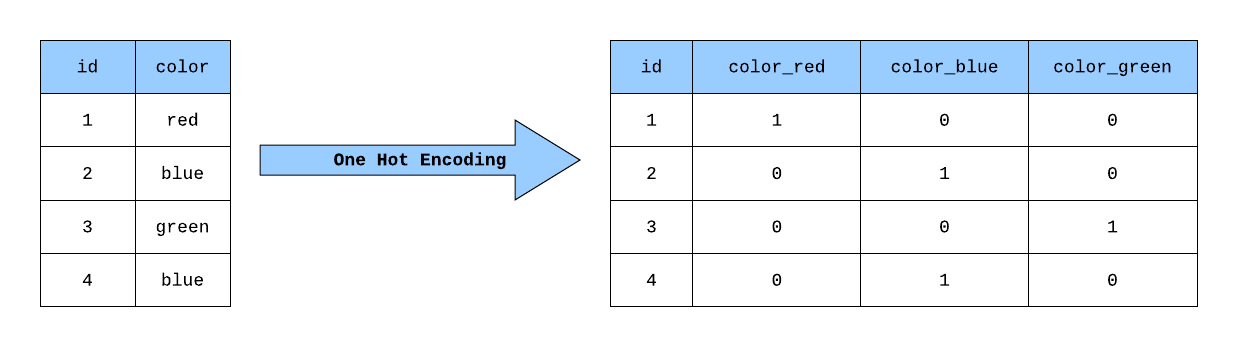

One Hot Encoding - наиболее распространенный метод кодирования категориальных переменных. Вот как он работает:

Пусть категориальная переменная имеет $n$ уникальных значений — $A_1$, $A_1$, $\dots$, $A_n$. Для каждого уникального значения $A_i$ создается новый столбец-признак. В каждом из этих столбцов значения всех элементов будут 0 или 1 (т.е. столбцы бинарные). В столбце, соответствующем значению $A_1$, единицы будут стоять в тех строках, в которых изначально у категориальной переменной было значение $A_1$

Например, если признак имеет три уникальных значения 'A', 'B' и 'C', то на его основе будет создано три столбца, и элемент со значением признака 'B' превратится в набор значений вида [0,1,0] в трех новых столбцах. Пример применения one-hot encoding также показан на картинке выше.

In [ ]:
unprocessed_cat_features

In [ ]:
df[unprocessed_cat_features]

In [ ]:
df.Title.unique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=df.index
                          )

In [ ]:
one_hot_df

In [ ]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_encoded

In [ ]:
# perform one-hot encoding on the 'color' column
one_hot = pd.get_dummies(df['Title'])

# concatenate the one-hot encoding with the original dataframe
df_one_hot = pd.concat([df, one_hot], axis=1)

# drop the original 'color' column
df_one_hot = df_one_hot.drop('Title', axis=1)

In [ ]:
df_one_hot

**Label Encoding**

В этом случае каждому уникальному значению столбца присваивается уникальное целочисленное значение.

Это более простой метод кодирования, но он имеет недостаток. Дето в том, что, переводя категориальные признаки в числа, мы задаем на элементах подядок. Например, если у нас есть признак "регион проживания", в котором значения "Москва", "Воронеж" и "Саратов", то после Label Encoding у нас получатся значения 0, 1 и 2. 2 > 1 > 0, но для изначальных значений признаков ("Москва", "Воронеж" и "Саратов") подобного отношения не существует. Некоторые модели машинного обучения могут пользоваться тем, что на элементах задан порядок, и тогда они будут неверно обрабатывать наши категориальные переменные.

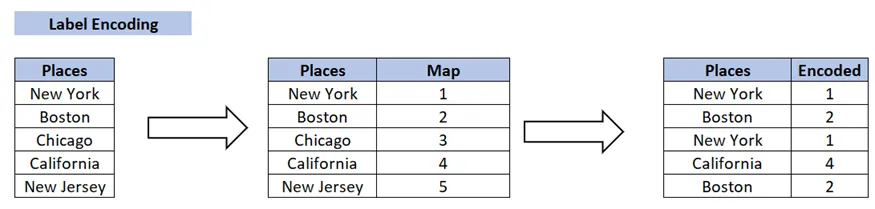

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  df[column] = label_encoding.fit_transform(df[column])

In [ ]:
df.head()

#### Количественные признаки

Выделим числовые признаки нашего датасета:

In [ ]:
numerical_columns = ['Age', 'Fare']

In [ ]:
num_features = df[numerical_columns]

print("Количество количественных признаков: ", len(num_features.columns))

In [ ]:
num_features

Посмотрим на распределения этих числовых признаков:

In [ ]:
num_features.hist(figsize=(10, 3), bins=50,xlabelsize=5, ylabelsize=5, grid=False);

И еще построим все возможные графики взаимных распределений всех признаков между собой:

In [ ]:
sns.set()
# взаимные графики на количественных признаков
sns.pairplot(df[numerical_columns], height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [ ]:
sns.set()
sns.pairplot(df, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

Также давайте построим матрицу корреляций наших признаков.

Корреляция — мера линейной зависимости признаков друг от друга. Сильно скоррелированные признаки могут иметь негативный эффект на обучение линейных моделей. Если в датасете есть сильно скоррелированные признаки, и вы хотите использовать линейную модель машинного обучения, то от таких признаков нужно избавляться. Делать это можно несколькими способами:

1. Оставляя один из признаков
2. Соединив признак в один и создав новый признак
3. Сделать нелинейное преобразование признаков

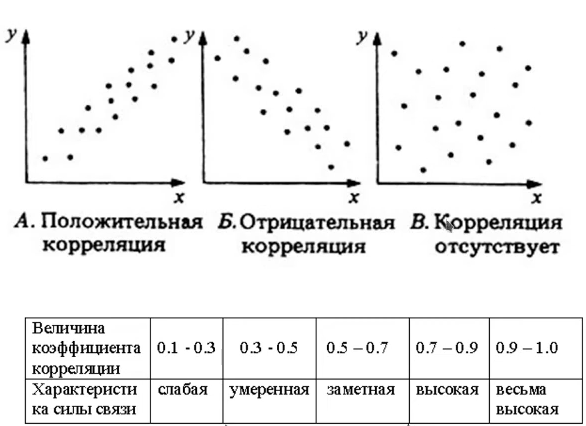

In [ ]:
corrmat = df[numerical_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Сделаем картинку чуть понятнее и красивее:

In [ ]:
# correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Получается, когда мы смотрим на матрицу корреляций, нам важно следующее:
1. Хорошо, если целевая переменная и признак коррелируют. Значит, есть понятная зависимость между ответом и признаком;
2. Плохо, если признаки коррелируют между собой.


### Шаг 3. Анализ влияния признаков на целевую переменную

Давайте теперь попробуем проанализировать наши данные в зависимости от нашей целевой переменной. Напомню, что в нашей задаче мы хотим предсказывать, выжил или не выжил человек на Титанике.

Попробуем ответить на следующие вопросы:
- Какие люди выживали чаще всего?
- Влияли ли пол и возраст на степень выживаемости на Титанике?
- Влияло ли наличие семьи на степень выживаемости?
- Есть ли зависимость стоимости билета от класса обслуживания?


Итак, какие люди выживали чаще всего?

Давайте нарисуем круговую диаграмму выживших в зависимости от класса обслуживания.

In [ ]:
df['Survived'].value_counts()

In [ ]:
# Готовим данные для графика
data = df['Survived'].value_counts()

# Строим круговую диаграмму
plt.pie(data.values,labels=data.index, autopct='%1.1f%%')

plt.legend(['не выжили, выжили'])

plt.show()

In [ ]:
df[df['Pclass'] == 1]['Survived'].value_counts()

In [ ]:
# Готовим данные для графика
data1 = df[df['Pclass'] == 1]['Survived'].value_counts()
data2 = df[df['Pclass'] == 2]['Survived'].value_counts()
data3 = df[df['Pclass'] == 3]['Survived'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')

ax1.set_title("Pclass = 1")
ax2.set_title("Pclass = 2")
ax3.set_title("Pclass = 3")

plt.legend(['не выжил, выжил'])

plt.show()

Можно заметить, что люди с самым низким классом обслуживания в большей степени не выжили.

Посмотрим теперь, влияли ли пол и возраст на степень выживаемости или нет:

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(df['Age'][df['Survived'] == 0], alpha=0.5, label='не выжил')
plt.hist(df['Age'][df['Survived'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

In [ ]:
# female - 0, male - 1
data_1 = df[df['Sex']== 1]['Survived'].value_counts().sort_values()
data_2 = df[df['Sex']== 0]['Survived'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

Можно заметить, что среди женщин процент выживших был гораздо больше.

Можно также отрисовать распределения признака возраста при помощи библиотеки seaborn.

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, hue='Survived')
plt.title('Age Distribution by Survived')
plt.show()

Давайте теперь проверим, есть ли влияние стоимости билета на выживаемость:

In [ ]:
# Готовим данные для графика
data1 = df['Fare'][df['Survived'] == 0]
data2 = df['Fare'][df['Survived'] == 1]
data1.head()

In [ ]:
# Строим боксплот

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Влияние стоимости билета на выживаемость')
plt.xlabel('Выжили')
plt.ylabel('Стоимость билета')
plt.xticks([1, 2], ['Нет', 'Да'])

plt.show()

Давайте поподробнее поймем, что это же такое боксплот.

Давайте сначала познакомимся с таким понятием как **квантиль распределения**. Квантили это такие значения признака, которые делят упорядоченные данные на некоторое число равных частей. К примеру, медиана делит наши данные на две равные части. Однако в статистике также часто используются квартили распределения. **Квартили распределения** это три точки, которые делят наши данные на 4 равные части.



        Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                      |-----:-----|
      o      |--------|     :     |--------|    o  o
                      |-----:-----|
    flier             <----------->            fliers
                          IQR

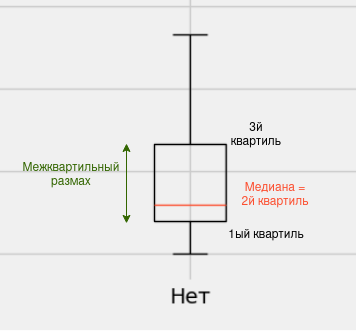

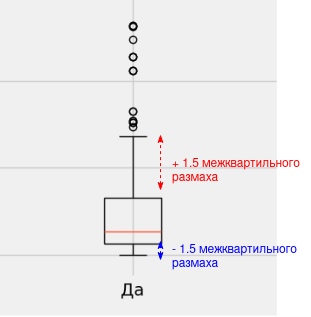

In [ ]:
first_quartile = np.quantile(df['Fare'].values, q=0.25)
third_quartile = np.quantile(df['Fare'].values, q=0.75)
print(f'1ый квартиль = {first_quartile}')
print(f'3ий квартиль = {third_quartile}')

Чем больше межквартильный размах, тем больше велика вариативность нашего признака.

In [ ]:
# Строим боксплот без выбросов

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Влияние стоимости билета на выживаемость')
plt.xlabel('Выжили')
plt.ylabel('Стоимость билета')
plt.xticks([1, 2], ['Нет', 'Да'])

plt.show()

## Подготовка данных для обучения модели

### Разделение на train/test

Разделять выборку на обучающую и тестирующую части мы будем при помощи библиотеки sklearn.

In [ ]:
df.head(3)

In [ ]:
X = df.drop(columns=['Survived']).values
y = df['Survived'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

(!) Важно: когда вы делите на train\test в функции `train_test_split()` есть параметр `shuffle`, который перемешивает данные.

Перемешивание данных - это простая, но мощная техника, позволяющая обеспечить эффективное обучение и оценку моделей машинного обучения. Случайная перестановка точек данных позволяет избежать смещений, улучшить обобщение и сделать модели более надежными.

### Масштабирование данных

Зачем нам нужно масштабировать данные?

Приводить данные к одной шкале важно, когда мы сравниваем измерения в разных единицах. Переменные, измеренные в разных масштабах, не вносят одинакового вклада в анализ и в итоге могут создать байес.

Например, переменная, находящаяся в диапазоне от 0 до 1000, будет превосходить переменную, находящуюся в диапазоне от 0 до 1. Использование этих переменных без стандартизации даст переменной с большим диапазоном вес 1000 в анализе. Преобразование данных в сопоставимые шкалы может предотвратить эту проблему. Типичные процедуры стандартизации данных выравнивают диапазон и/или изменчивость данных.

Как мы говорили в лекции часто необходимо привести все признаки к одному масштабу. Для этого существует библиотека sklearn, которая предоставляет методы рескейлинга данных. На этом семинаре мы рассмотрим два основных: `StandardScaler()` и `MinMaxScaler()`. У каждого скейлера есть два метода: `.fit()` и `.transform()`.

`StandardScaler()` во время `.fit()` для каждого признака $x_i$ считает среднее $\mu_i$ и стандартное отклонение $\sigma_i$ на обучающем датасете. Во время `.transform()` к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - \mu_i}{\sigma_i}$$


`MinMaxScaler()` во время `.fit()` для каждого признака $x_i$ считает минимум $x_{i, \text{min}}$ и максимум $x_{i, \text{max}}$ на обучающем датасете. Во время `.transform()` к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - x_{i, \text{min}}}{x_{i, \text{max}} - x_{i, \text{min}}}$$

(!)Важно, чтобы статистика данных считалась только на обучающей выборке, т.е. на `X_train`, так как иначе, если мы будем считать статистику на всем датасете, модель будет уже иметь какую то информацию о тестовой выборке и предсказания будут нечестными, так как по сути вы ей дали подсказку.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

## Заключение



На данном семинаре мы с вами познакомились с библиотеками Pandas и Matplotlib.

Давайте еще раз вспомним основные шаги анализа и обработки данных:
1. Очистка данных
2. Создание новых признаков
3. Удаление неинформативных столбцов
4. Анализ целевой переменной и признаков
5. Анализ влияния признаков на целевую переменную
6. Подготовка данных к обучению и валидации.

Теперь вы можете сами подготавливать любые датасеты под свои задачи.

Все ссылочки в одном месте!

* Студенты с прошлых потоков сделали замечательную [инструкцию](https://disk.yandex.ru/i/sqqI2xVBcztIDw) по использованию Google Colab, где вы можно узнать, как можно загрузить данные на Google Disk.
* Очень классный плейлист на ютубе про работу с pandas [What is a Pandas?](https://youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&si=6faVt2CiaaA73QAQ).

* Для базового ознакомления с Matplotlib можно почитать официальный туториал [Matplotlib Quick Start](https://matplotlib.org/stable/tutorials/introductory/quick_start.html).
* Классная лекция про визуальный анализ данных $→$ [тык на ссылку](https://www.youtube.com/watch?v=uJpDzHGUamg&ab_channel=machinelearrrning).
* Классный сайт для подбора цветов: [In Color Balance](https://color.romanuke.com/)
* Курс по [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) от Kaggle
* Разные методы кодирования категориальных признаков [блог-пост](https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f)